In [76]:
import pandas as pd
import os
import matplotlib.pyplot as plt

In [77]:
# Define the base folder
base_folder = r"D:\bag_project"

In [78]:
import pandas as pd
import os
import matplotlib.pyplot as plt

In [79]:
# Initialize an empty list to store the data
data = []

In [80]:
# Function to check and read CSV files
def process_csv_file(file_path):
    try:
        # Read the CSV file
        df = pd.read_csv(file_path)

        # Ensure the 'Timestamp' column exists
        timestamp_col = None
        for col in df.columns:
            if col.strip().lower() == 'timestamp':
                timestamp_col = col
                break
        
        if timestamp_col:
            # Convert the 'Timestamp' column to datetime
            df[timestamp_col] = pd.to_datetime(df[timestamp_col], unit='s')
            
            # Calculate the duration
            start_time = df[timestamp_col].min()
            end_time = df[timestamp_col].max()
            duration = (end_time - start_time).total_seconds() / 60  # Convert seconds to minutes
            
            # Store the result in the data list
            data.append({
                'file_path': file_path,
                'duration_minutes': duration
            })
        else:
            print(f"Timestamp column not found in {file_path}")
    except Exception as e:
        print(f"Error reading {file_path}: {e}")

# Traverse the directory structure
for subfolder in os.listdir(base_folder):
    subfolder_path = os.path.join(base_folder, subfolder)
    
    if os.path.isdir(subfolder_path):
        # Construct the path to the _anavs_solution_pos_llh.csv file
        csv_file_path = os.path.join(subfolder_path, "_anavs_solution_pos_llh.csv")
        
        if os.path.isfile(csv_file_path):
            print(f"Processing file: {csv_file_path}")
            process_csv_file(csv_file_path)
        

Processing file: D:\bag_project\New folder\_anavs_solution_pos_llh.csv
Processing file: D:\bag_project\New folder (2)\_anavs_solution_pos_llh.csv
Processing file: D:\bag_project\New folder (3)\_anavs_solution_pos_llh.csv
Processing file: D:\bag_project\New folder (4)\_anavs_solution_pos_llh.csv
Processing file: D:\bag_project\New folder (5)\_anavs_solution_pos_llh.csv
Processing file: D:\bag_project\New folder (6)\_anavs_solution_pos_llh.csv
Processing file: D:\bag_project\New folder (7)\_anavs_solution_pos_llh.csv
Processing file: D:\bag_project\_anavs_solution_pos_llh\_anavs_solution_pos_llh.csv


In [81]:
# Create a DataFrame from the data
result_df = pd.DataFrame(data)

In [82]:
result_df

,file_path,duration_minutes
0,D:\bag_project\New folder\_anavs_solution_pos_...,15.991929
1,D:\bag_project\New folder (2)\_anavs_solution_...,15.991929
2,D:\bag_project\New folder (3)\_anavs_solution_...,15.991929
3,D:\bag_project\New folder (4)\_anavs_solution_...,15.991929
4,D:\bag_project\New folder (5)\_anavs_solution_...,15.991929
5,D:\bag_project\New folder (6)\_anavs_solution_...,15.991929
6,D:\bag_project\New folder (7)\_anavs_solution_...,15.991929
7,D:\bag_project\_anavs_solution_pos_llh\_anavs_...,15.991929


In [83]:
# Display the DataFrame
print(result_df)

print("Finished processing files.")

                                           file_path  duration_minutes
0  D:\bag_project\New folder\_anavs_solution_pos_...         15.991929
1  D:\bag_project\New folder (2)\_anavs_solution_...         15.991929
2  D:\bag_project\New folder (3)\_anavs_solution_...         15.991929
3  D:\bag_project\New folder (4)\_anavs_solution_...         15.991929
4  D:\bag_project\New folder (5)\_anavs_solution_...         15.991929
5  D:\bag_project\New folder (6)\_anavs_solution_...         15.991929
6  D:\bag_project\New folder (7)\_anavs_solution_...         15.991929
7  D:\bag_project\_anavs_solution_pos_llh\_anavs_...         15.991929
Finished processing files.


In [84]:
# Save the DataFrame as a CSV file
output_csv_path = r"D:\bag_project\duration_data_for_Swaraj_v2.csv"
result_df.to_csv(output_csv_path, index=False)

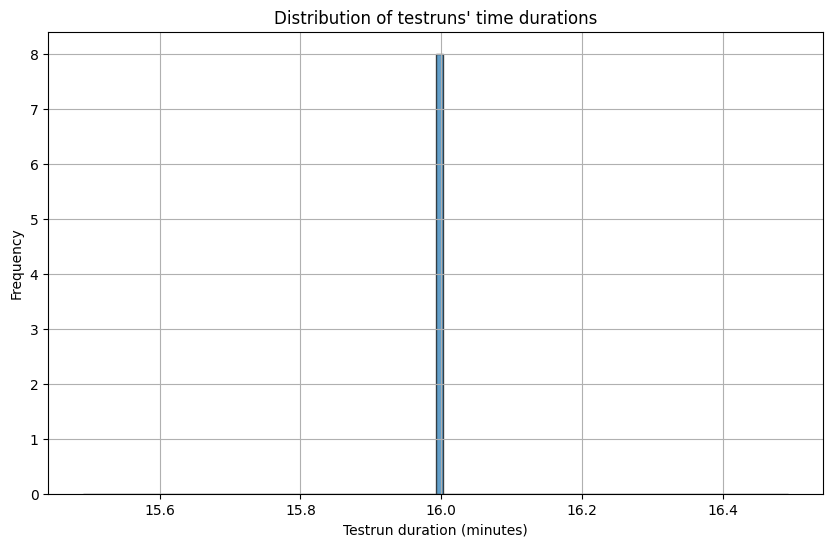

In [85]:
#Plotting the results
plt.figure(figsize=(10, 6))
plt.hist(result_df['duration_minutes'], bins=100, edgecolor='black', alpha=0.7)
plt.title('Distribution of testruns\' time durations')
plt.xlabel('Testrun duration (minutes)')
plt.ylabel('Frequency')
plt.grid(True)